## 2. Data Analysis 
    
### A. How does the number of individual Robinhood accounts holding a given security affect the strike price of the underlying? How does this affect implied volatility?

### B. What is the correlation between price and volatility? For which stocks does the effect of Robinhood popularity have the greatest impact?, and what insights do this offer on Robinhood's user base?

### Import libraries + csv robinhood tickers + alpaca tickers prices 

In [120]:
# Import libraries and dependencies
import os
import pandas as pd
from pathlib import Path
import requests
import json
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv

#import numpy as np
#from MCForecastTools import MCSimulation

%matplotlib inline

In [121]:
# Load .env enviroment variables
load_dotenv()

True

### Get Robinhood users per ticker

In [8]:
#### read csvs robintrack.ticker.csv

def get_data_robintrack(full_filepath):
    df_robin_data = pd.read_csv (full_filepath)   

    return df_robin_data

In [9]:
#### get data from robintrack.ticker.csv and store it in a single dataframe by month 

list_of_tickers = ["ABB", "TSLA", "AMD", "RIOT"]
df_concat_robin_users = pd.DataFrame()

ft = True
for ticker in list_of_tickers:

    filepath = Path("../data/cleandata/Robintrack_Data/" + ticker + "_csv_clean.csv")

    df_robin_data = get_data_robintrack(filepath)

    #    transform column str 'timestamp' into timestamp
    df_robin_data['timestamp'] = pd.to_datetime(df_robin_data['timestamp'])

    #   # resample groupying by day 
    df_robin_data = df_robin_data.resample('D', on='timestamp').mean()

    df_robin_data = df_robin_data.rename(columns={'users_holding':f'U_{ticker}'})

    if ft == True:
        df_concat_robin_users = pd.concat([df_robin_data], axis="columns", join="outer")
        ft = False
    else:
        df_concat_robin_users = pd.concat([df_concat_robin_users, df_robin_data], axis="columns", join="outer")
    
    #print(df_concat_robin_users.head())

In [59]:
# monthly - number of robinhood users per tick 
df_concat_robin_users.head()

,U_ABB,U_TSLA,U_AMD,U_RIOT
timestamp,,,,
2020-01-01,2149.000000,120106.166667,168839.333333,15627.000000
2020-01-02,2145.958333,120386.583333,169453.291667,15628.541667
2020-01-03,2141.666667,121590.916667,171703.458333,15634.208333
2020-01-04,2147.000000,122393.666667,172670.130435,15630.000000
2020-01-05,2147.000000,122392.000000,172667.000000,15630.000000


In [12]:
# export robin users - tickers to csv 
df_concat_robin_users.to_csv(r'../data/cleandata/Processed_Data/tickers_users.csv', index = False)


In [14]:
# filling NaN = STILL PENDING !!
df_robin_data['users_holding'] = df_robin_data['users_holding'].fillna(2147.00)



### Get tickers - prices from ALPACA
#### store close price into a dataframe and export to to csv

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("GGC_ALPACA_API_KEY")
alpaca_secret_key = os.getenv("GGC_ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [15]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
#start_date = pd.Timestamp.today(tz="America/New_York").isoformat()[0:10]    #[0:10] only date

end_date = pd.Timestamp("2020-08-10", tz="America/New_York").isoformat()
#end_date = pd.Timestamp.today(tz="America/New_York").isoformat()[0:10]      #[0:10] only date

# Set the tickers
tickers = ["ABB", "TSLA", "AMD", "RIOT"]

# Set timeframe to '1D' 
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Preview DataFrame
df_tickers.head()


ABB                                   AMD         \
                            open    high    low  close   volume   open   high   
time                                                                            
2020-01-02 00:00:00-05:00  24.32  24.380  24.26  24.37  1253586  46.86  49.25   
2020-01-03 00:00:00-05:00  24.05  24.235  24.05  24.17  1317223  48.03  49.39   
2020-01-06 00:00:00-05:00  24.12  24.360  24.11  24.32  1701977  48.02  48.86   
2020-01-07 00:00:00-05:00  24.23  24.300  24.14  24.28  1133708  49.35  49.39   
2020-01-08 00:00:00-05:00  24.22  24.450  24.22  24.36  1296416  47.85  48.30   

                                                   RIOT                     \
                             low  close    volume  open  high   low  close   
time                                                                         
2020-01-02 00:00:00-05:00  46.63  49.11  77354773  1.14  1.23  1.13  1.217   
2020-01-03 00:00:00-05:00  47.54  48.57  70131747  1.22  1.22  1.14  1.190   
2020-01-06 00:00:00-05:00  47.86  48.39  43344539  1.23  1.30  1.20  1.290   
2020-01-07 00:00:00-05:00  48.04  48.24  53833107  1.39  1.50  1.33  1.485   
2020-01-08 00:00:00-05:00  47.14  47.84  51859353  1.54  1.54  1.29  1.350   

                                      TSLA                               \
                            volume    open      high      low     close   
time                                                                      
2020-01-02 00:00:00-05:00   900844  424.95  430.6957  421.710  430.2400   
2020-01-03 00:00:00-05:00   459030  440.50  454.0000  436.920  442.7500   
2020-01-06 00:00:00-05:00   988813  440.47  451.5600  440.000  451.4001   
2020-01-07 00:00:00-05:00  3156053  461.40  471.6300  453.355  469.1700   
2020-01-08 00:00:00-05:00  1739923  473.70  498.4900  468.230  492.0900   

                                     
                             volume  
time                                 
2020-01-02 00:00:00-05:00   9113793  
2020-01-03 00:00:00-05:00  16409329  
2020-01-06 00:00:00-05:00   9807049  
2020-01-07 00:00:00-05:00  16859537  
2020-01-08 00:00:00-05:00  29804104

In [154]:
# Count nulls
#df_tickers.isnull().sum()

In [16]:
# Create and empty DataFrame for closing prices
df_tickers_closing_prices = pd.DataFrame()

# Fetch the closing prices 
df_tickers_closing_prices["ABB"] = df_tickers["ABB"]["close"]
df_tickers_closing_prices["TSLA"] = df_tickers["TSLA"]["close"]
df_tickers_closing_prices["AMD"] = df_tickers["AMD"]["close"]
df_tickers_closing_prices["RIOT"] = df_tickers["RIOT"]["close"]

# Drop the time component of the date
df_tickers_closing_prices.index = df_tickers_closing_prices.index.date

df_tickers_closing_prices.head()

,ABB,TSLA,AMD,RIOT
2020-01-02,24.37,430.2400,49.11,1.217
2020-01-03,24.17,442.7500,48.57,1.190
2020-01-06,24.32,451.4001,48.39,1.290
2020-01-07,24.28,469.1700,48.24,1.485
2020-01-08,24.36,492.0900,47.84,1.350


In [17]:
# export prices-tickers to a csv
df_tickers_closing_prices.to_csv(r'../data/cleandata/Processed_Data/tickers_prices.csv', index = False)

### Mix together (contactenate) price data from alpaca + users per ticker into a single dataframe for analysis

In [18]:
# Concatenate the two DataFrames by columns and perform an inner join
concat_robin_ticker = pd.concat([df_tickers_closing_prices, df_concat_robin_users], axis="columns", join="inner")
concat_robin_ticker

,ABB,TSLA,AMD,RIOT,U_ABB,U_TSLA,U_AMD,U_RIOT
2020-01-02,24.370,430.2400,49.11,1.2170,2145.958333,120386.583333,169453.291667,15628.541667
2020-01-03,24.170,442.7500,48.57,1.1900,2141.666667,121590.916667,171703.458333,15634.208333
2020-01-06,24.320,451.4001,48.39,1.2900,2147.000000,122391.000000,172656.333333,15630.333333
2020-01-07,24.280,469.1700,48.24,1.4850,NaN,NaN,NaN,NaN
2020-01-08,24.360,492.0900,47.84,1.3500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-08-04,25.630,1486.2500,85.05,3.3900,3601.708333,538575.625000,248388.541667,28026.208333
2020-08-05,25.950,1485.1800,85.33,4.0100,3597.041667,538723.625000,254085.791667,28179.250000
2020-08-06,26.025,1489.6900,86.71,4.2300,3592.083333,536258.541667,257336.666667,29611.333333
2020-08-07,25.985,1453.1000,84.84,3.7579,3591.041667,535743.541667,259311.166667,30497.083333


In [19]:
# export tickets - prices - users to csv
df_concat_robin_users.to_csv(r'../data/cleandata/Processed_Data/prices_users.csv', index = False)

In [20]:
concat_robin_ticker.isnull().sum()

ABB       0
TSLA      0
AMD       0
RIOT      0
U_ABB     7
U_TSLA    7
U_AMD     7
U_RIOT    7
dtype: int64

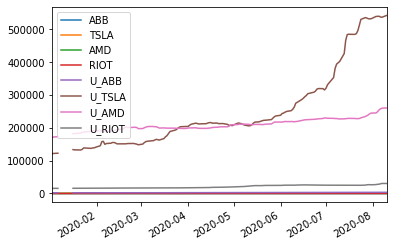

In [21]:
# Plot the data trends of the two variables over time
concat_robin_ticker.plot()

### correlation on prices and number of users --> export results to csv

In [25]:
# Calculate the correlation prices vs number of users 
correl_robin_ticker = concat_robin_ticker.corr()
correl_robin_ticker

,ABB,TSLA,AMD,RIOT,U_ABB,U_TSLA,U_AMD,U_RIOT
ABB,1.000000,0.575567,0.499586,0.550278,0.208435,0.478177,0.331931,0.292904
TSLA,0.575567,1.000000,0.737176,0.798801,0.788347,0.912493,0.852235,0.793563
AMD,0.499586,0.737176,1.000000,0.792726,0.609305,0.757243,0.724541,0.662366
RIOT,0.550278,0.798801,0.792726,1.000000,0.800854,0.761062,0.835103,0.888422
U_ABB,0.208435,0.788347,0.609305,0.800854,1.000000,0.827328,0.894889,0.974777
U_TSLA,0.478177,0.912493,0.757243,0.761062,0.827328,1.000000,0.901821,0.820327
U_AMD,0.331931,0.852235,0.724541,0.835103,0.894889,0.901821,1.000000,0.921911
U_RIOT,0.292904,0.793563,0.662366,0.888422,0.974777,0.820327,0.921911,1.000000


In [26]:
#export correlection prices - tickers to csv 
correl_robin_ticker.to_csv(r'../data/cleandata/Processed_Data/correl_prices_users.csv', index = False)

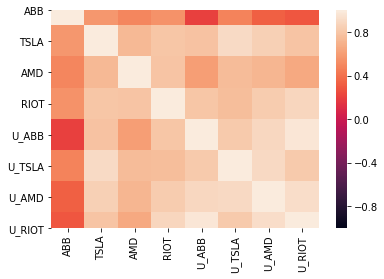

In [27]:
# `heatmap` from the seaborn library to visualize correlations
import seaborn as sns
sns.heatmap(correl_robin_ticker, vmin=-1, vmax=1)

### Daily returns prices and number of users --> export results to csv

In [28]:
# calculate the daily returns prices and users
daily_ret_robin_ticker = concat_robin_ticker.pct_change()
daily_ret_robin_ticker.head()

,ABB,TSLA,AMD,RIOT,U_ABB,U_TSLA,U_AMD,U_RIOT
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.008207,0.029077,-0.010996,-0.022186,-0.00200,0.010004,0.013279,0.000363
2020-01-06,0.006206,0.019537,-0.003706,0.084034,0.00249,0.006580,0.005550,-0.000248
2020-01-07,-0.001645,0.039366,-0.003100,0.151163,0.00000,0.000000,0.000000,0.000000
2020-01-08,0.003295,0.048852,-0.008292,-0.090909,0.00000,0.000000,0.000000,0.000000


In [29]:
# export daily returns to CSV
daily_ret_robin_ticker.to_csv(r'../data/cleandata/Processed_Data/daily_ret_prices_users.csv', index = False)

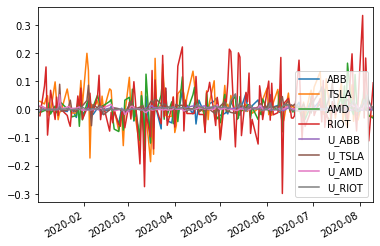

In [30]:
# Plot the daily returns 
daily_ret_robin_ticker.plot()

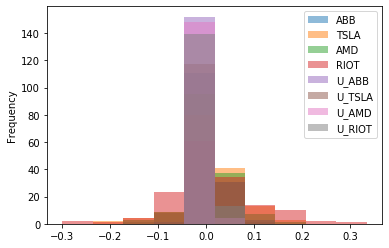

In [32]:
# daily returns distribution (histogram)
daily_ret_robin_ticker.plot.hist(alpha=0.5)

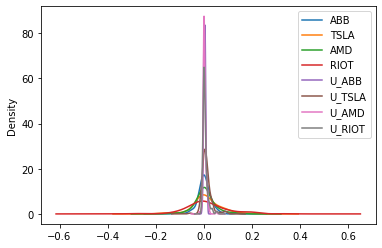

In [35]:
# daily returns distribution density plot 
daily_ret_robin_ticker.plot.density()

### correlation daily returns prices and number of users --> export results to csv

In [36]:
#correlation daily returns prices and users 
correl_daily_ret_robin_ticker = daily_ret_robin_ticker.corr()
correl_daily_ret_robin_ticker

,ABB,TSLA,AMD,RIOT,U_ABB,U_TSLA,U_AMD,U_RIOT
ABB,1.000000,0.463630,0.534419,0.454883,0.029119,0.084853,0.041310,0.025920
TSLA,0.463630,1.000000,0.429509,0.339386,0.000573,0.116566,0.017842,-0.002439
AMD,0.534419,0.429509,1.000000,0.339492,-0.002509,0.063263,0.065535,0.117059
RIOT,0.454883,0.339386,0.339492,1.000000,0.073018,0.022242,0.079597,0.047513
U_ABB,0.029119,0.000573,-0.002509,0.073018,1.000000,0.116865,0.069747,0.060175
U_TSLA,0.084853,0.116566,0.063263,0.022242,0.116865,1.000000,0.163803,-0.155259
U_AMD,0.041310,0.017842,0.065535,0.079597,0.069747,0.163803,1.000000,0.208995
U_RIOT,0.025920,-0.002439,0.117059,0.047513,0.060175,-0.155259,0.208995,1.000000


In [38]:
# export correlation daily returns to csv
correl_daily_ret_robin_ticker.to_csv(r'../data/cleandata/Processed_Data/correl_daily_ret_prices_users.csv', index = False)

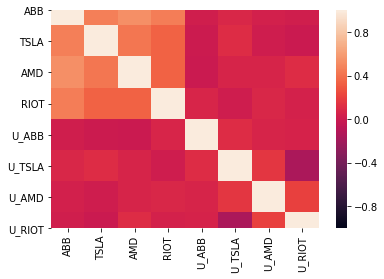

In [39]:
# `heatmap` correlation daily returns 
sns.heatmap(correl_daily_ret_robin_ticker, vmin=-1, vmax=1)